## Import libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Load Dataset

In [ ]:
df = pd.read_csv("./data/diabetes.csv", sep=",")

# Data preparation

## Scaling

In [ ]:
numeric = df.select_dtypes(include=np.number)
numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,442.0,48.518100,13.109028,19.0000,38.2500,50.00000,59.0000,79.000
SEX,442.0,1.468326,0.499561,1.0000,1.0000,1.00000,2.0000,2.000
BMI,442.0,26.375792,4.418122,18.0000,23.2000,25.70000,29.2750,42.200
BP,442.0,94.647014,13.831283,62.0000,84.0000,93.00000,105.0000,133.000
S1,442.0,189.140271,34.608052,97.0000,164.2500,186.00000,209.7500,301.000
S2,442.0,115.439140,30.413081,41.6000,96.0500,113.00000,134.5000,242.400
S3,442.0,49.788462,12.934202,22.0000,40.2500,48.00000,57.7500,99.000
S4,442.0,4.070249,1.290450,2.0000,3.0000,4.00000,5.0000,9.090
S5,442.0,4.641411,0.522391,3.2581,4.2767,4.62005,4.9972,6.107
S6,442.0,91.260181,11.496335,58.0000,83.2500,91.00000,98.0000,124.000


In [ ]:
scaler_std = StandardScaler()
scaled_std = pd.DataFrame(scaler_std.fit_transform(numeric), columns=numeric.columns)
scaled_std.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,442.0,8.037814e-18,1.001133,-2.254290,-0.784172,0.113172,0.800500,2.327895
SEX,442.0,1.607563e-16,1.001133,-0.938537,-0.938537,-0.938537,1.065488,1.065488
BMI,442.0,1.004727e-16,1.001133,-1.897929,-0.719625,-0.153132,0.656952,3.585718
BP,442.0,1.060991e-15,1.001133,-2.363050,-0.770650,-0.119214,0.749368,2.776058
S1,442.0,-2.893613e-16,1.001133,-2.665411,-0.720020,-0.090841,0.596193,3.235851
S2,442.0,-1.245861e-16,1.001133,-2.430626,-0.638249,-0.080291,0.627442,4.179278
S3,442.0,-1.326239e-16,1.001133,-2.150883,-0.738296,-0.138431,0.616239,3.809072
S4,442.0,-1.446806e-16,1.001133,-1.606102,-0.830301,-0.054499,0.721302,3.894331
S5,442.0,2.250588e-16,1.001133,-2.651040,-0.698949,-0.040937,0.681851,2.808722
S6,442.0,2.371155e-16,1.001133,-2.896390,-0.697549,-0.022657,0.586922,2.851075


In [ ]:
scaler_mm = MinMaxScaler()
scaled_mm = pd.DataFrame(scaler_mm.fit_transform(numeric), columns=numeric.columns)
scaled_mm.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,442.0,0.491968,0.218484,0.0,0.320833,0.516667,0.666667,1.0
SEX,442.0,0.468326,0.499561,0.0,0.000000,0.000000,1.000000,1.0
BMI,442.0,0.346107,0.182567,0.0,0.214876,0.318182,0.465909,1.0
BP,442.0,0.459817,0.194807,0.0,0.309859,0.436620,0.605634,1.0
S1,442.0,0.451668,0.169647,0.0,0.329657,0.436275,0.552696,1.0
S2,442.0,0.367725,0.151460,0.0,0.271165,0.355578,0.462649,1.0
S3,442.0,0.360889,0.167977,0.0,0.237013,0.337662,0.464286,1.0
S4,442.0,0.291996,0.182010,0.0,0.141044,0.282087,0.423131,1.0
S5,442.0,0.485560,0.183366,0.0,0.357542,0.478062,0.610446,1.0
S6,442.0,0.503942,0.174187,0.0,0.382576,0.500000,0.606061,1.0


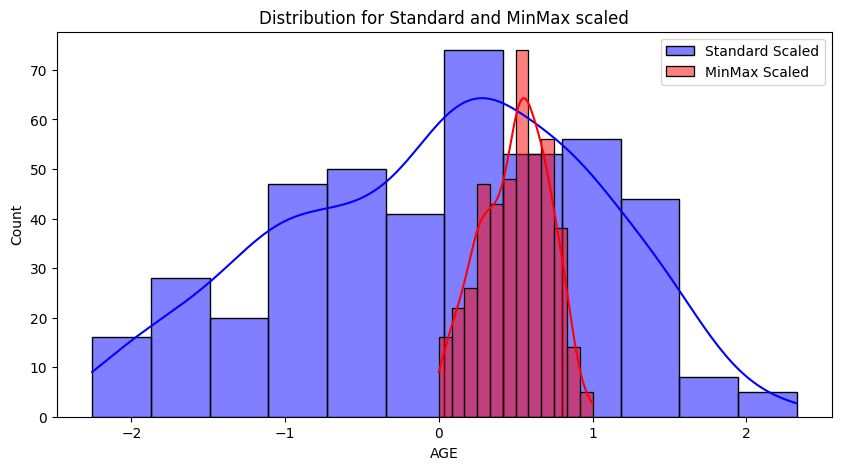

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(scaled_std.iloc[:,0], kde=True, color='blue', label='Standard Scaled')
sns.histplot(scaled_mm.iloc[:,0], kde=True, color='red', label='MinMax Scaled')
plt.legend()
plt.title('Distribution for Standard and MinMax scaled')
plt.show()

## Train Test Split

In [ ]:
target = "Y"

X = df.drop(target, axis=1)
y = df[target]
test_size=0.2
random_state=42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
print('Train size:', X_train.shape, '| Test size:', X_test.shape)

Train size: (353, 10) | Test size: (89, 10)


## Outliers detection

In [ ]:
# IQR method

Q1 = numeric.quantile(0.25)
Q3 = numeric.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((numeric < (Q1 - 1.5 * IQR)) | (numeric > (Q3 + 1.5 * IQR))).sum()
print('Outliers detected per feature (IQR):')
print(outliers_iqr[outliers_iqr > 0])

Outliers detected per feature (IQR):
BMI    3
S1     8
S2     7
S3     7
S4     2
S5     4
S6     9
dtype: int64


In [ ]:
# Z-score method

z_scores = np.abs(stats.zscore(df.select_dtypes(include='number')))
outliers_z = (z_scores > 3).sum(axis=0)
print('Outliers detected per feature (Z-score > 3):')
print(outliers_z[outliers_z > 0])

Outliers detected per feature (Z-score > 3):
[2 2 2 5 4]


In [ ]:
scaler = RobustScaler()

numeric_cols = X_train.select_dtypes(include=np.number).columns

X_train_scaled = X_train.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

X_train_scaled.head()


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
17,0.894737,1.0,0.266667,0.857143,0.622222,0.895288,-0.5625,0.5,0.418177,-0.066667
66,-0.263158,1.0,-0.200000,-0.380952,-0.266667,0.272251,-1.1250,1.0,0.013217,0.266667
137,-0.052632,0.0,0.850000,1.428571,-0.177778,-0.204188,0.0000,0.0,0.263796,-0.266667
245,-0.526316,0.0,-0.466667,-0.333333,-0.844444,-0.910995,0.6250,-0.5,-0.736340,-2.133333
31,-0.473684,0.0,-0.933333,-1.047619,-0.555556,-0.827225,1.1250,-1.0,-0.545851,-0.733333


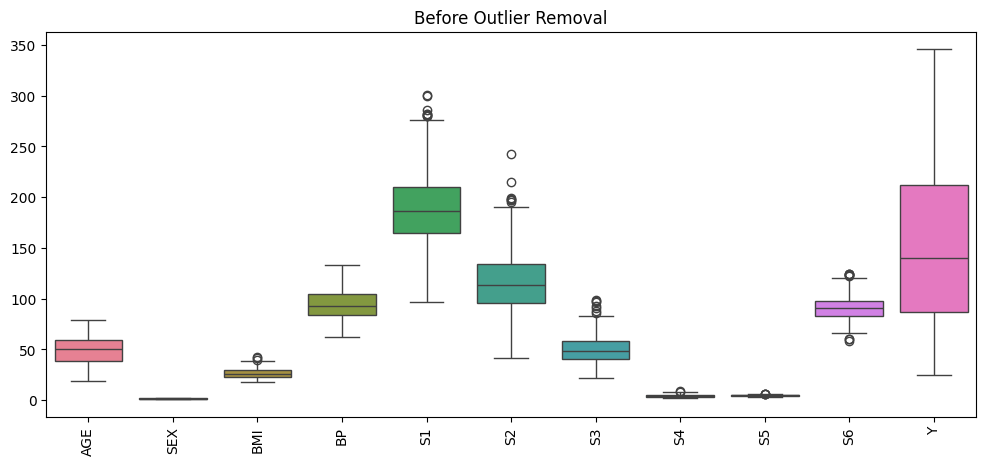

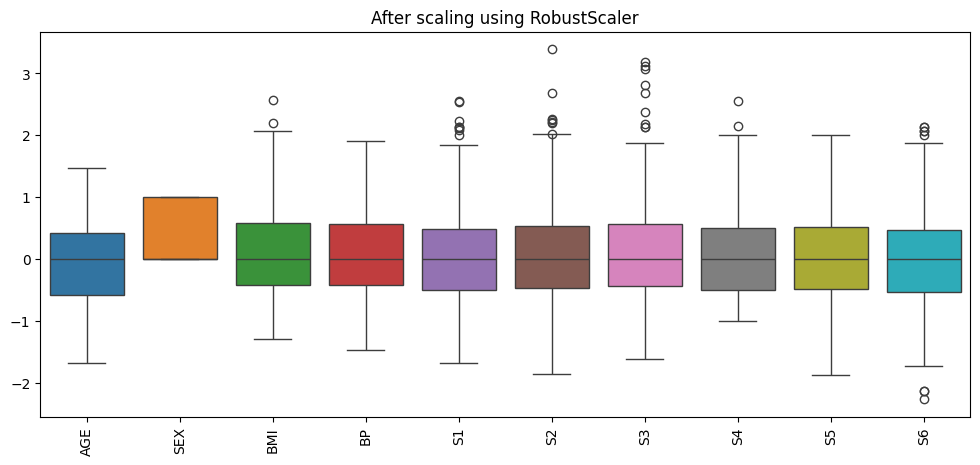

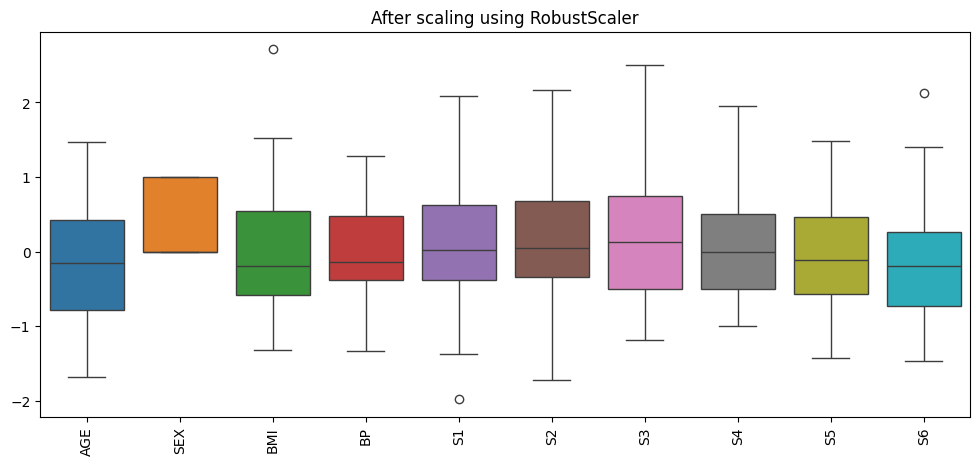

In [ ]:
# Boxplots: Before vs After Outlier Removal

plt.figure(figsize=(12, 5))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title('Before Outlier Removal')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=X_train_scaled.select_dtypes(include='number'))
plt.title('After scaling using RobustScaler')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=X_test_scaled.select_dtypes(include='number'))
plt.title('After scaling using RobustScaler')
plt.xticks(rotation=90)
plt.show()

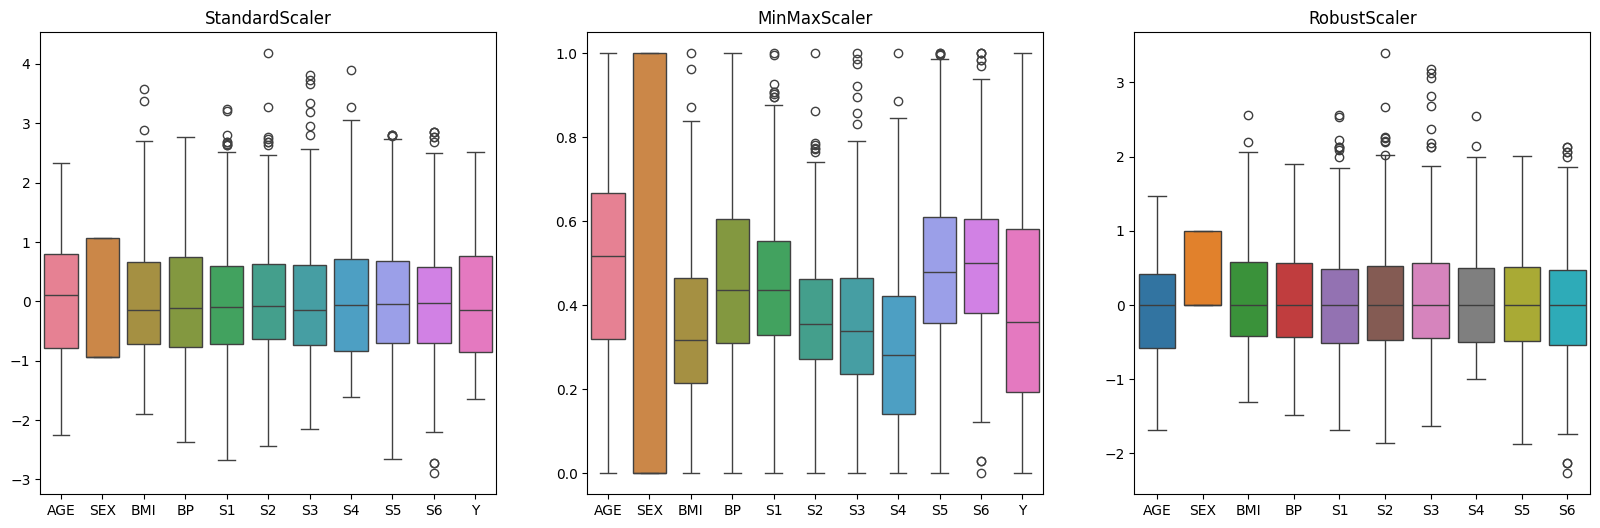

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))

sns.boxplot(data=scaled_std, ax=axes[0])
axes[0].set_title("StandardScaler")

sns.boxplot(data=scaled_mm, ax=axes[1])
axes[1].set_title("MinMaxScaler")

sns.boxplot(data=X_train_scaled, ax=axes[2])
axes[2].set_title("RobustScaler")

plt.show()


# Model training

## Import necessary libraries for model training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

## Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

pred_lr = lr.predict(X_test_scaled)

mae_lr = mean_absolute_error(y_test, pred_lr)
mse_lr = mean_squared_error(y_test, pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, pred_lr)


## Random forest

### Define grid

In [ ]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10]
}

### Grid search cv

In [ ]:
rf = RandomForestRegressor(random_state=42)

grid_rf = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
print("Best RF params:", grid_rf.best_params_)

Best RF params: {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 200}
Best RF params: {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 200}


### Predict evaluate

In [ ]:
pred_rf = best_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, pred_rf)

## Gradient Boosting regressor + tuning

### Param grid

In [ ]:
param_grid_gb = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [2, 3, 4]
}

### Grid search

In [ ]:
gb = GradientBoostingRegressor(random_state=42)

grid_gb = GridSearchCV(gb, param_grid_gb, cv=5, n_jobs=-1)
grid_gb.fit(X_train_scaled, y_train)

best_gb = grid_gb.best_estimator_
print("Best GB params:", grid_gb.best_params_)

Best GB params: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}


### Predict and evaluate

In [ ]:
pred_gb = best_gb.predict(X_test_scaled)

mae_gb = mean_absolute_error(y_test, pred_gb)
mse_gb = mean_squared_error(y_test, pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, pred_gb)

## Results

In [ ]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"],
    "MAE": [mae_lr, mae_rf, mae_gb],
    "MSE": [mse_lr, mse_rf, mse_gb],
    "RMSE": [rmse_lr, rmse_rf, rmse_gb],
    "R2 Score": [r2_lr, r2_rf, r2_gb]
})

results

,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,42.794095,2900.193628,53.853446,0.452603
1,Random Forest,42.725168,2774.561442,52.674106,0.476315
2,Gradient Boosting,42.582154,2749.649262,52.437098,0.481017


# Utils that was used to show the results

In [57]:
def eval_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"Model": name, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

def plot_pred_vs_actual(y_test, y_pred, title):
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', label='Perfect Prediction')
    plt.xlabel("Actual Y")
    plt.ylabel("Predicted Y")
    plt.title(title)
    plt.legend()
    plt.show()

def plot_residuals(y_test, y_pred, title):
    residuals = y_test - y_pred
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Y")
    plt.ylabel("Residuals")
    plt.title(title)
    plt.show()

def plot_residual_hist(y_test, y_pred, title):
    residuals = y_test - y_pred
    plt.figure(figsize=(7, 5))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(title)
    plt.xlabel("Residuals")
    plt.show()


# Model training where Outliers where removed with IQR method

## Remove outliers

In [ ]:
numeric_iqr = numeric

Q1_iqr = numeric_iqr.quantile(0.25)
Q3_iqr = numeric_iqr.quantile(0.75)
IQR_iqr = Q3_iqr - Q1_iqr

mask_iqr = ~((numeric_iqr < (Q1_iqr - 1.5 * IQR_iqr)) |
             (numeric_iqr > (Q3_iqr + 1.5 * IQR_iqr))).any(axis=1)

df_iqr_clean = df[mask_iqr].reset_index(drop=True)

print("Original rows:", len(df))
print("After IQR outlier removal:", len(df_iqr_clean))

Original rows: 442
After IQR outlier removal: 411


## Model training

In [ ]:
results_iqr = []

# 1. Linear Regression
lr_iqr = LinearRegression()
lr_iqr.fit(X_train_scaled, y_train)
pred_lr_iqr = lr_iqr.predict(X_test_scaled)
results_iqr.append(eval_model("Linear Regression (IQR)", y_test, pred_lr_iqr))

# 2. Random Forest
rf_iqr = RandomForestRegressor(n_estimators=200, random_state=42)
rf_iqr.fit(X_train, y_train)  # tree models don't need scaling
pred_rf_iqr = rf_iqr.predict(X_test)
results_iqr.append(eval_model("Random Forest (IQR)", y_test, pred_rf_iqr))

# 3. Gradient Boosting
gb_iqr = GradientBoostingRegressor(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=3)
gb_iqr.fit(X_train_scaled, y_train)
pred_gb_iqr = gb_iqr.predict(X_test_scaled)
results_iqr.append(eval_model("Gradient Boosting (IQR)", y_test, pred_gb_iqr))

pd.DataFrame(results_iqr)


,Model,MAE,MSE,RMSE,R2
0,Linear Regression (IQR),42.794095,2900.193628,53.853446,0.452603
1,Random Forest (IQR),44.304326,2972.961796,54.524873,0.438868
2,Gradient Boosting (IQR),44.860062,3003.935324,54.808168,0.433022


# Try Ridge, Lasso and ElasticNet model training methods

## Load necessary libs for this training

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

## Train them

In [ ]:
results_lin = []

# 1. Linear Regression
lr_lin = LinearRegression()
lr_lin.fit(X_train_scaled, y_train)
pred_lr_lin = lr_lin.predict(X_test_scaled)
results_lin.append(eval_model("Linear Regression", y_test, pred_lr_lin))

# 2. Ridge
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_scaled, y_train)
pred_ridge = ridge.predict(X_test_scaled)
results_lin.append(eval_model("Ridge (alpha=1.0)", y_test, pred_ridge))

# 3. Lasso
lasso = Lasso(alpha=0.01, max_iter=10000, random_state=42)
lasso.fit(X_train_scaled, y_train)
pred_lasso = lasso.predict(X_test_scaled)
results_lin.append(eval_model("Lasso (alpha=0.01)", y_test, pred_lasso))

# 4. ElasticNet
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000, random_state=42)
elastic.fit(X_train_scaled, y_train)
pred_elastic = elastic.predict(X_test_scaled)
results_lin.append(eval_model("ElasticNet (alpha=0.01, l1_ratio=0.5)", y_test, pred_elastic))

pd.DataFrame(results_lin)


,Model,MAE,MSE,RMSE,R2
0,Linear Regression,42.794095,2900.193628,53.853446,0.452603
1,Ridge (alpha=1.0),42.826022,2887.753622,53.737823,0.454951
2,Lasso (alpha=0.01),42.795632,2897.650390,53.829828,0.453083
3,"ElasticNet (alpha=0.01, l1_ratio=0.5)",42.842929,2882.948793,53.693098,0.455858


# XGBoost and CatBoost

## Install necessary libs

In [ ]:
!pip install xgboost catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.7 MB/s eta 0:00:00


## Import necessary libs

In [ ]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

## XGBoost regressor

In [ ]:
xgb = XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror"
)

xgb.fit(X_train_scaled, y_train)
pred_xgb = xgb.predict(X_test_scaled)
res_xgb = eval_model("XGBoost", y_test, pred_xgb)
res_xgb


{'Model': 'XGBoost',
 'MAE': 44.81646728515625,
 'MSE': 3217.9541015625,
 'RMSE': np.float64(56.727013860792106),
 'R2': 0.39262712001800537}

## CatBoost regressor

In [ ]:
cat = CatBoostRegressor(
    depth=4,
    learning_rate=0.05,
    n_estimators=400,
    loss_function="RMSE",
    random_seed=42,
    verbose=False
)

cat.fit(X_train_scaled, y_train)
pred_cat = cat.predict(X_test_scaled)
res_cat = eval_model("CatBoost", y_test, pred_cat)
res_cat


{'Model': 'CatBoost',
 'MAE': 44.36451282065791,
 'MSE': 2872.115500494707,
 'RMSE': np.float64(53.592121627107716),
 'R2': 0.4579023710865108}

In [ ]:
# Results
pd.DataFrame([res_xgb, res_cat])

,Model,MAE,MSE,RMSE,R2
0,XGBoost,44.816467,3217.954102,56.727014,0.392627
1,CatBoost,44.364513,2872.115500,53.592122,0.457902


# Bigger hyperparameter grids with RandomizedSearch and Bayesian Tuning

## Install necessary libs

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 5.1 MB/s eta 0:00:00


In [49]:
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Integer, Real

## RandomizedSearchCV for Random forest

In [51]:
rf_base = RandomForestRegressor(random_state=42)

param_dist_rf = {
    "n_estimators": [200, 300, 500, 700, 1000],
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

rand_search_rf = RandomizedSearchCV(
    rf_base,
    param_distributions=param_dist_rf,
    n_iter=30,
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rand_search_rf.fit(X_train, y_train)
print("Best RF params (RandomizedSearch):", rand_search_rf.best_params_)

rf_best_rand = rand_search_rf.best_estimator_
pred_rf_rand = rf_best_rand.predict(X_test)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best RF params (RandomizedSearch): {'n_estimators': 700, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5}


## Bayesian tuning for XGBoost

In [52]:
xgb_base = XGBRegressor(
    objective="reg:squarederror",
    random_state=42
)

search_spaces_xgb = {
    "n_estimators": Integer(200, 800),
    "max_depth": Integer(2, 8),
    "learning_rate": Real(0.01, 0.3, prior="log-uniform"),
    "subsample": Real(0.5, 1.0),
    "colsample_bytree": Real(0.5, 1.0)
}

bayes_search_xgb = BayesSearchCV(
    estimator=xgb_base,
    search_spaces=search_spaces_xgb,
    n_iter=30,
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

bayes_search_xgb.fit(X_train_scaled, y_train)
print("Best XGB params (Bayesian):", bayes_search_xgb.best_params_)

xgb_best_bayes = bayes_search_xgb.best_estimator_
pred_xgb_bayes = xgb_best_bayes.predict(X_test_scaled)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

## Results

In [53]:
res_rf_rand = eval_model("Random Forest (RandomizedSearch)", y_test, pred_rf_rand)
res_xgb_bayes = eval_model("XGBoost (Bayesian)", y_test, pred_xgb_bayes)

pd.DataFrame([res_rf_rand, res_xgb_bayes])

,Model,MAE,MSE,RMSE,R2
0,Random Forest (RandomizedSearch),43.573224,2821.06323,53.113682,0.467538
1,XGBoost (Bayesian),41.927536,2684.53125,51.812462,0.493308


## Visual evaluation

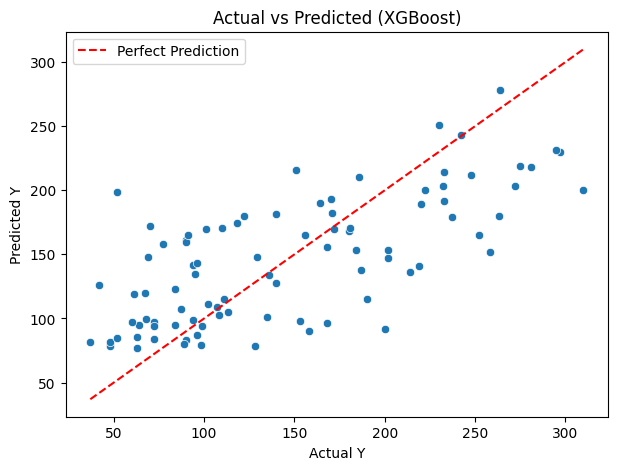

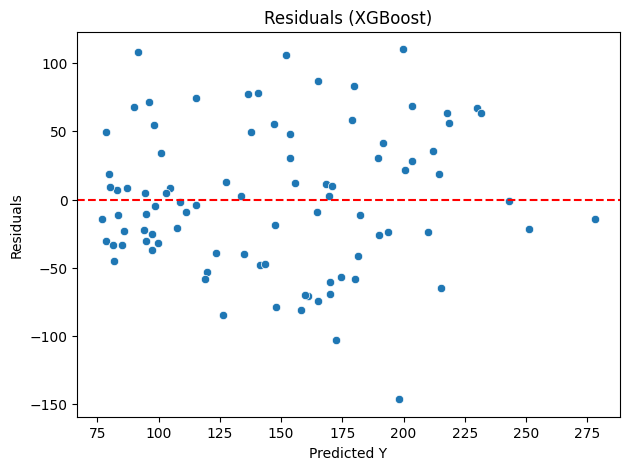

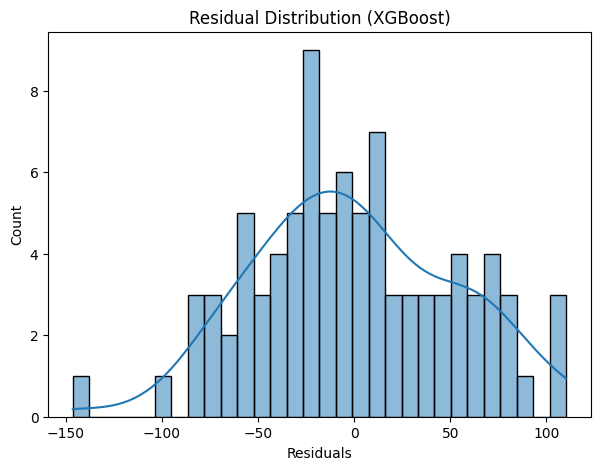

In [58]:
plot_pred_vs_actual(y_test, pred_xgb_bayes, "Actual vs Predicted (XGBoost)")
plot_residuals(y_test, pred_xgb_bayes, "Residuals (XGBoost)")
plot_residual_hist(y_test, pred_xgb_bayes, "Residual Distribution (XGBoost)")